In [3]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
%load_ext autoreload
%autoreload 2
#import sys
#sys.path.append('/Users/jeffreyhazboun/GoogleDrive/PulsarSignalSimulator/PulsarSimulator/VersionZeroPointZero')
#sys.path.append('/Users/jeffrey/GoogleDrive/PulsarSignalSimulator/PulsarSimulator/VersionZeroPointZero')
import VersionZeroPointZero as PSS
#import signal as sig
#import pulsar as puls
#import ism as ism
#import math, scipy
#import scipy as sp
#from scipy import signal

ImportError: No module named VersionZeroPointZero

In [ ]:
from matplotlib.pyplot import *

In [4]:
length = 4096
data = np.random.normal(0,1,length)
xlim(0,len(data))
plot(data)
show()
LENGTH = 2
DATA = np.random.normal(1e-6,1e-6,LENGTH)
plot(DATA)
show()

NameError: name 'xlim' is not defined

In [5]:
time = np.arange(length)
window = np.exp(-(time-512)**2/1000.0)
xlim(0,len(window))
plot(window)
show()
title("Voltage vs. Time Pulse (One Polarization)")
xticks([])
yticks([])
xlim(0,650)#len(window))
plot(window*data)
show()

NameError: name 'xlim' is not defined

In [6]:
def DataSeries(N=10):
    pulseSeries=[]
    for ii in range(N):
        pulseSeries= np.append(pulseSeries,np.random.normal(0,1,length)*window)
    dataSeries=pulseSeries + 1*np.random.normal(0,1,len(pulseSeries))
    return dataSeries,pulseSeries
dataSeries, pulseSeries= DataSeries()

In [12]:
xlim(0,len(dataSeries))
plot(dataSeries**2)
plot(pulseSeries)
show()

NameError: name 'xlim' is not defined

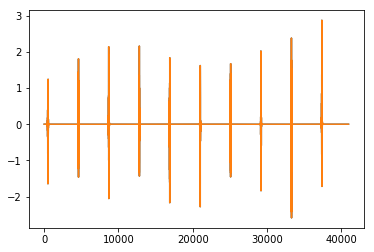

In [11]:
a1 = np.fft.rfft(pulseSeries)
a2 = np.fft.irfft(a1)
plot(pulseSeries)
plot(a2)
show()

In [12]:
length2 = len(a1)
print(length2)

20481


In [13]:
DM = 100
freq = np.linspace(-100e9,100e9,length2)
FREQ = np.fft.rfftfreq(2*len(freq)-1, d=5e-5)
f0 = 1e9
H_ = np.exp(1j*2*np.pi*4.148808e18/((FREQ+f0)*f0**2)*DM*FREQ**2)
H = np.exp(1j*2*np.pi*4.148808e9/((freq+f0)*f0**2)*DM*freq**2)
a3 = a1*H_
a4 = np.fft.irfft(a3)
print np.ptp(FREQ)
len(FREQ) == len(freq)

9999.75586534


True

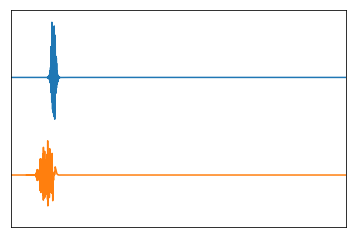

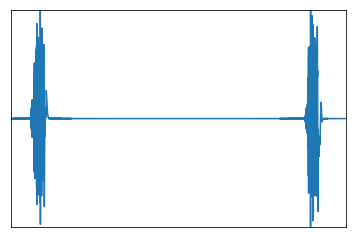

In [154]:
xlim(0,4000)
xticks([])
yticks([])
plot(pulseSeries+4)
plot(a4)
show()
xlim(0,5000)
ylim(-1.3,1.3)
xticks([])
yticks([])
plot(a4)
show()
show()

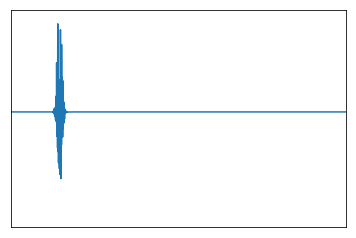

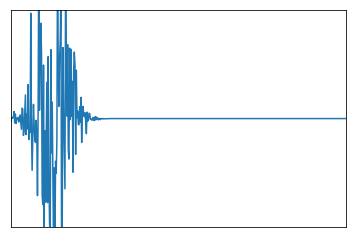

In [99]:
xlim(0,3500)
xticks([])
yticks([])
plot(pulseSeries+4)
show()
xlim(450,950)
ylim(-1.3,1.3)
xticks([])
yticks([])
plot(a4)
show()
show()

20481
10241
20481


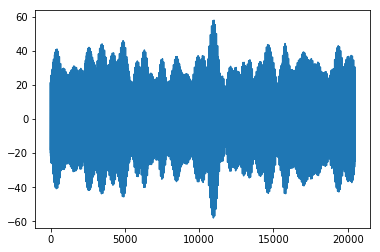

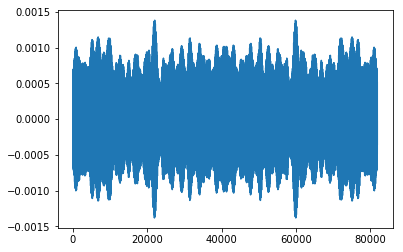

In [92]:
# Now to try changing the sampling frequencies.  I got an error message when I tried to change just some of them
# of course, because that made not all the arrays the same length.  Which probably means this won't do anything
PULSESERIES = np.fft.rfftfreq(len(pulseSeries))
A1test = np.fft.irfft(pulseSeries)
a1test = np.fft.rfft(PULSESERIES)
a2test = np.fft.irfft(a1test)
print len(PULSESERIES)
print len(a1test)
print len(a1)
plot(a1)
show()
plot(A1test)
show()
# I'm not really sure why I'm losing exactly 1 number.  I get that taking the real FFT in a1test divides the
# length of PULSESERIES by 2 and adds 1 (for 0) but I can't tell why I would lose 1 when I go back to time 
# The above definition of a1test is wrong because of the input of already transformed frequencies
# wrong wrong wrong
# This is wrong

In [93]:
DM = 200
freq = np.linspace(-200e6,0,len(a1test))
# Defining Freq with just len(freq) it throws an error because it makes H and a1test different lengths
Freq = np.fft.rfftfreq((2*len(freq)-1))
f0 = 820e6
H = np.exp(1j*2*np.pi*4.148808e9/((freq+f0)*f0**2)*DM*freq**2)
Htest = np.exp(1j*2*np.pi*4.148808e9/((Freq+f0)*f0**2)*DM*Freq**2)
a3test = a1test*Htest
a4test = np.fft.irfft(a3test)
print len(a1test)
print len(H)
# EVERYTHING SEEMS TO WORK SO FAR. FOR THE MOMENT OF TRUTH

10241
10241


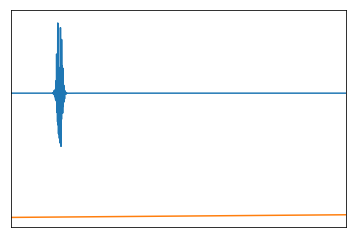

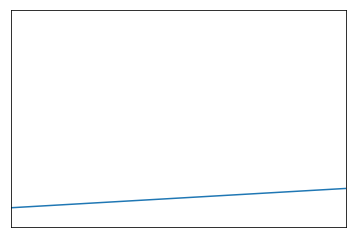

In [94]:
xlim(0,3500)
xticks([])
yticks([])
plot(pulseSeries+4)
plot(a4test)
show()
xlim(1000,3000)
xticks([])
yticks([])
plot(a4test)
show()
show()

# ah yes the sweet and familiar taste of failure

In [95]:
'''G = np.exp(-1j*2*np.pi*4.148808e9/(f0)*5*DM*freq)
a5 = a1*G
a6 = np.fft.irfft(a5)'''

'G = np.exp(-1j*2*np.pi*4.148808e9/(f0)*5*DM*freq)\na5 = a1*G\na6 = np.fft.irfft(a5)'

In [96]:
'''xlim(400,1000)
plot(pulseSeries+4)
plot(a6)
show()
xlim(0,2000)
plot(pulseSeries)
plot(a6)
show()'''

'xlim(400,1000)\nplot(pulseSeries+4)\nplot(a6)\nshow()\nxlim(0,2000)\nplot(pulseSeries)\nplot(a6)\nshow()'

In [20]:
'''data_fft=np.fft.rfft(dataSeries**2)
f1,Power1 = sp.signal.periodogram(dataSeries)
f2,Power2 = sp.signal.periodogram(dataSeries**2)'''

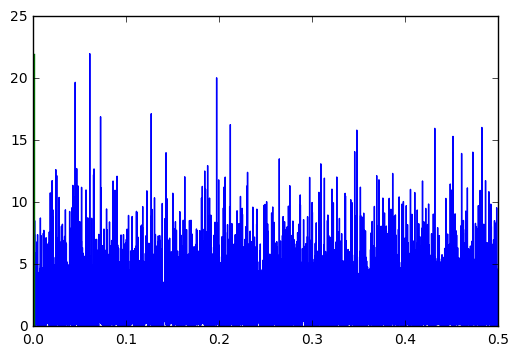

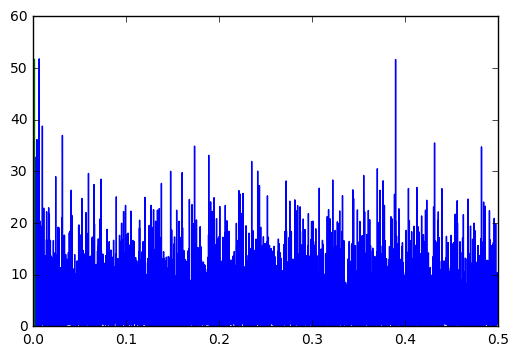

In [21]:
#xlim(0,1e-2)
'''
L=len(Power1)
plot(f1,Power1)
plot(np.ones(10)*1/1024,np.linspace(0,np.amax(Power1),10))
show()
plot(f2,Power2)
plot(np.ones(10)*1/1024,np.linspace(0,np.amax(Power2),10))
show()

In [1]:
'''i = 100
ToSum = np.zeros((i,10240))
for ii in range(i):
    ToSum[ii,:] = DataSeries(3)
xlim(0,len(ToSum[2,:]))
plot(ToSum[2,:])
show()'''

'i = 100\nToSum = np.zeros((i,10240))\nfor ii in range(i):\n    ToSum[ii,:] = DataSeries(3)\nxlim(0,len(ToSum[2,:]))\nplot(ToSum[2,:])\nshow()'

In [2]:
#Folded = np.sum(ToSum**2,axis=0)
#ProdFolded = np.product(ToSum**2,axis=0)

In [3]:
'''xlim(0,len(Folded)/10)
plot(Folded)
show()
xlim(0,len(Folded)/10)
#ylim(1e-150,1e-20)
plot(np.log(ProdFolded))
show()'''

'xlim(0,len(Folded)/10)\nplot(Folded)\nshow()\nxlim(0,len(Folded)/10)\n#ylim(1e-150,1e-20)\nplot(np.log(ProdFolded))\nshow()'

In [4]:
#np.amin(np.log(ProdFolded**2))

In [5]:
'''xlim(0,5000)
plot(np.sum(np.log(ToSum**2),axis=0))
show()'''

'xlim(0,5000)\nplot(np.sum(np.log(ToSum**2),axis=0))\nshow()'

In [6]:
'''def PowerSpectrum(x,step):
    L = len(x)//step
    PS = np.empty((step//2+1,L))
    for ii in range(L):
        start = ii*step
        stop = (ii+1)*step
        #PS[:,ii] = np.fft.rfft(x[start:stop])
        f, PS[:,ii] = sp.signal.periodogram(x[start:stop],12.5e6)
    return PS'''

'def PowerSpectrum(x,step):\n    L = len(x)//step\n    PS = np.empty((step//2+1,L))\n    for ii in range(L):\n        start = ii*step\n        stop = (ii+1)*step\n        #PS[:,ii] = np.fft.rfft(x[start:stop])\n        f, PS[:,ii] = sp.signal.periodogram(x[start:stop],12.5e6)\n    return PS'

In [7]:
#P1 = PowerSpectrum(Folded,2**6)

In [8]:
#P1.shape

In [9]:
'''figure(figsize=[10,4])
imshow(P1, origin='lower', aspect='auto')
show()
xlim(0,len(P1[0,:]))
plot(P1[2,:])
plot(P1[3,:])
plot(np.sum(P1,axis=0))
show()
'''

"figure(figsize=[10,4])\nimshow(P1, origin='lower', aspect='auto')\nshow()\nxlim(0,len(P1[0,:]))\nplot(P1[2,:])\nplot(P1[3,:])\nplot(np.sum(P1,axis=0))\nshow()\n"

In [289]:
#P2= PowerSpectrum(dataSeries,2**7)

In [10]:
'''figure(figsize=[10,4])
imshow(P2, origin='lower', aspect='auto')
show()
xlim(len(P2[0,:]))
plot(np.sum(P2,axis=0))
show()'''

"figure(figsize=[10,4])\nimshow(P2, origin='lower', aspect='auto')\nshow()\nxlim(len(P2[0,:]))\nplot(np.sum(P2,axis=0))\nshow()"

In [12]:
'''SinG = np.sin(time)*window
xlim(400,600)
plot(SinG)
show()'''

'SinG = np.sin(time)*window\nxlim(400,600)\nplot(SinG)\nshow()'

In [65]:
'''WPacketTest = np.fft.rfft(SinG)*H
Shifted_WP = np.fft.irfft(WPacketTest)'''

In [11]:
'''xlim(400,800)
plot(SinG+2)
plot(Shifted_WP)

show()'''

'xlim(400,800)\nplot(SinG+2)\nplot(Shifted_WP)\n\nshow()'

In [13]:
#SinG.shape

# Jeff's Attempts

In [57]:
def H_disp(Freq,F0):
    return np.exp(1j*2*np.pi*4.148808e9/((Freq+F0)*F0**2)*DM*Freq**2)

In [58]:
# Recall
# pulseSeries is defined in a for loop, and is the product of a gaussian and random noise. This can be iterated
# as many times as needed, but here it's just 1 pulse.
a1 = np.fft.rfft(pulseSeries)
PULSESERIES = np.fft.rfftfreq(len(pulseSeries),d=.1)
a1test = np.fft.rfft(PULSESERIES)
freq = np.linspace(-200e6,0,length2)
# Defining Freq with just len(freq) it throws an error because it makes H and a1test different lengths
Freq = np.fft.rfftfreq((2*len(freq)-1))
length2 = len(a1)
print(length2)
len(freq) == len(Freq) # returns True
print(len(H_disp(Freq,820)))
print

1025
1025



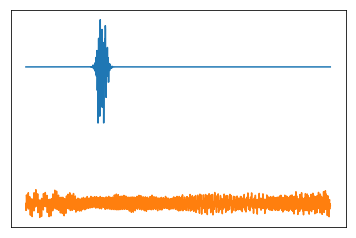

('the above plot shows a dispersed signal with the central frequency', 400)


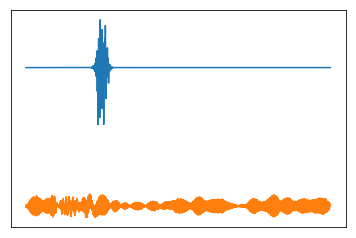

('the above plot shows a dispersed signal with the central frequency', 700)


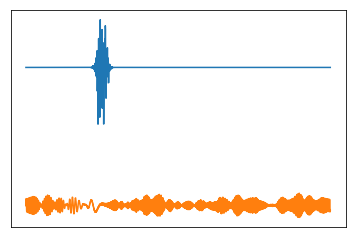

('the above plot shows a dispersed signal with the central frequency', 750)


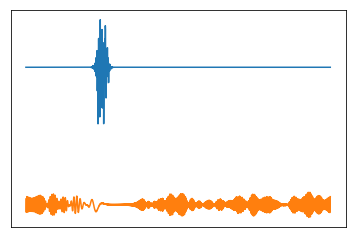

('the above plot shows a dispersed signal with the central frequency', 775)


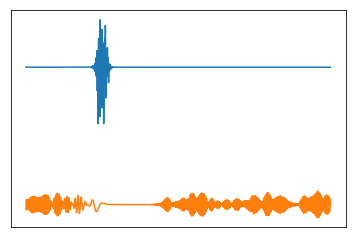

('the above plot shows a dispersed signal with the central frequency', 800)


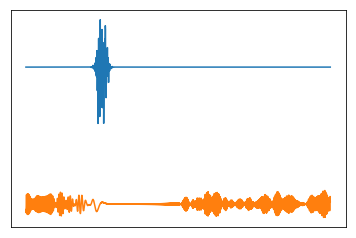

('the above plot shows a dispersed signal with the central frequency', 820)


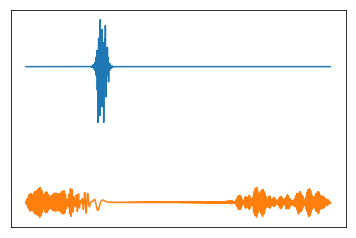

('the above plot shows a dispersed signal with the central frequency', 900)


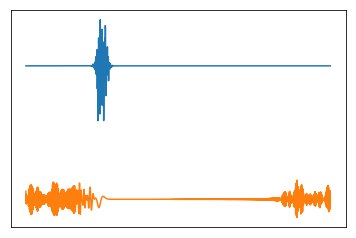

('the above plot shows a dispersed signal with the central frequency', 1000)


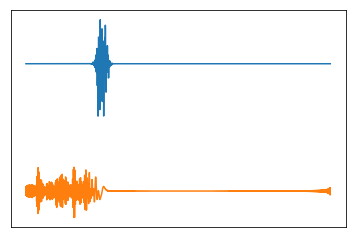

('the above plot shows a dispersed signal with the central frequency', 1200)


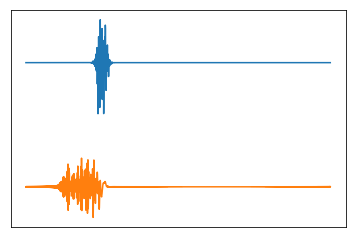

('the above plot shows a dispersed signal with the central frequency', 1500)


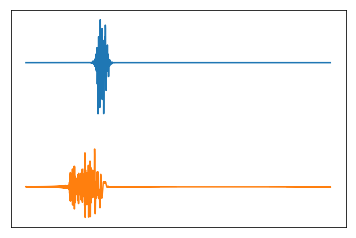

('the above plot shows a dispersed signal with the central frequency', 1600)


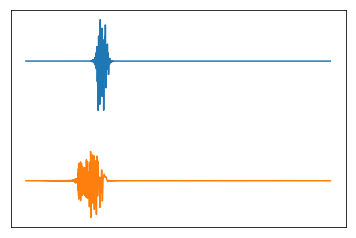

('the above plot shows a dispersed signal with the central frequency', 1800)


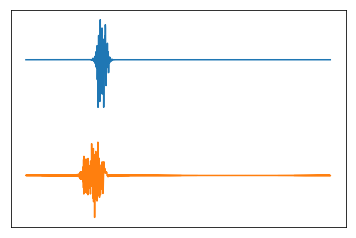

('the above plot shows a dispersed signal with the central frequency', 2000)


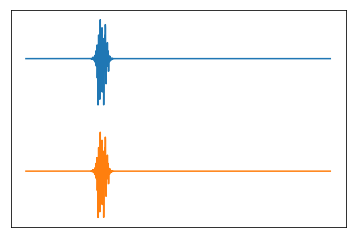

('the above plot shows a dispersed signal with the central frequency', 1000000.0)


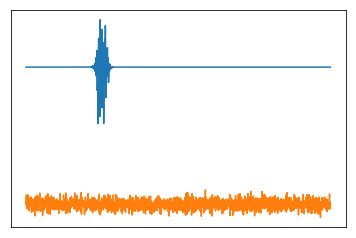

('the above plot shows a dispersed signal with the central frequency', 0.24987798926305516)


In [77]:
# Adjusting the central frequency to be put into the transfer function
# FREQ is a list of inputs to try for the transfer function.  This is kept constant
# To successfully adjust the size of FREQ, you'd need to alter len(a1) accordingly.
DM = 200
FREQ = np.fft.rfftfreq(2*len(freq)-1)
f0 = [400,700,750,775,800,820,900,1000,1200,1500,1600,1800,2000,1e6,FREQ[FREQ.size//2]]#The last is the middle frequency from rfftfreq()

for F0 in f0:
    c3 = a1*H_disp(FREQ,F0)
    c4 = np.fft.irfft(c3)
    #xlim(0,4000)
    xticks([])
    yticks([])
    plot(pulseSeries+4)
    plot(c4)
    show()
    #xlim(950,3000)
#    ylim(-1.3,1.3)
#    xticks([])
#    yticks([])
#    plot(c4)
#    show()
    print('the above plot shows a dispersed signal with the central frequency', F0)


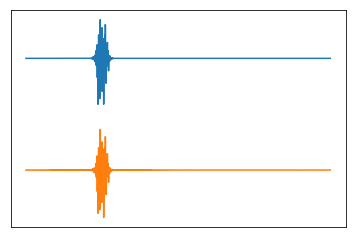

('the above two plots correspond to a sample spacing of', 100)


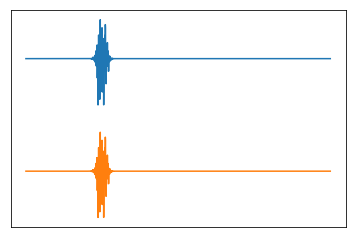

('the above two plots correspond to a sample spacing of', 1000)


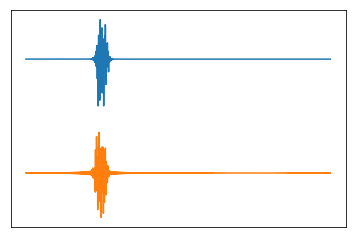

('the above two plots correspond to a sample spacing of', 10)


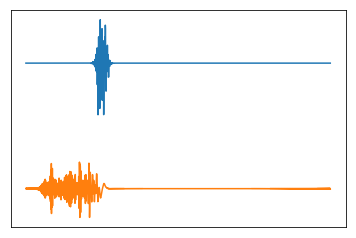

('the above two plots correspond to a sample spacing of', 2)


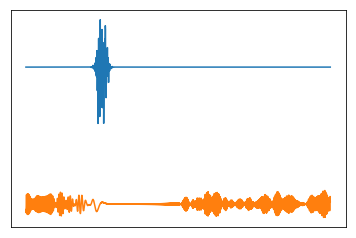

('the above two plots correspond to a sample spacing of', 1)


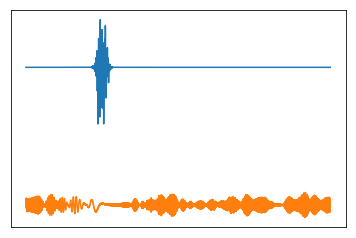

('the above two plots correspond to a sample spacing of', 0.9)


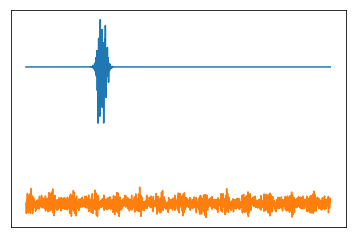

('the above two plots correspond to a sample spacing of', 0.1)


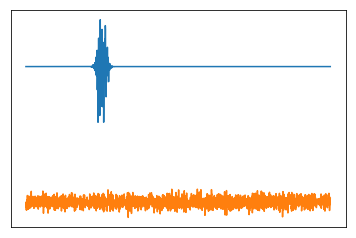

('the above two plots correspond to a sample spacing of', 0.01)


In [71]:
# Altering the sample spacing to see what will provide the best and most physically significant dispersed signal
DM = 200
dt_array=[100,1000,10,2,1,0.9,0.1,0.01]
for dt in dt_array:
    FREQ = np.fft.rfftfreq(2*len(freq)-1,d=dt)
    c3 = a1*H_disp(FREQ,820)
    c4 = np.fft.irfft(c3)
    #xlim(0,4000)
    xticks([])
    yticks([])
    plot(pulseSeries+4)
    plot(c4)
    show()
    #xlim(950,3000)
    #ylim(-1.3,1.3)
    #xticks([])
    #yticks([])
    #plot(c4)
    #show()
    print("the above two plots correspond to a sample spacing of", dt)
# Making the sample spacing too small (0.1,0.01) seems to disperse it too much to see a singular signal
# While you can observe some periodicity with the 0.1 sampling anything smaller is too much
# On the other hand, using a sample spacing of 10 seems to lose a lot of information and effectively not
# disperse the signal at all.  


# How np.fft.rfftfreq() works:
1. accepts the length of an array                                                                                       
⋅⋅* doesn't matter what values are in the array, just the length of it                                                  
⋅⋅* array values must be integers                                                                                      
⋅⋅* starts at 0, will go up to the inverse of half the maximum value in said array                                         
2. accepts sample spacing d
⋅⋅* by default, this is 1. spacing of 1 second. so this is in time space                                                
⋅⋅* d can be edited                                                                                                     
⋅⋅* increasing d _decreases_ the maximum frequency in the list which is returned but makes the difference between         one frequency and the next (in the returned list) smaller 
⋅⋅* 
3. returns a list in _*in frequency space*_ which is 1 + len(array)/2                                                  
⋅⋅* because we're interested in real ffts here the values will necessarily be positive
⋅⋅*

In [59]:
x = np.linspace(0,100e6,100e6) # should be 100000000 long
xx = np.linspace(0,5,5) # should be 5 long

X = np.fft.rfftfreq(len(x))
print(X)
print(len(X))
XX = np.fft.rfftfreq(len(xx))
print(XX)
print(len(XX))
print(np.max(X))
print(np.max(XX))
XXX = np.fft.rfftfreq(len(xxx))
print(XXX)

[  0.00000000e+00   1.00000000e-08   2.00000000e-08 ...,   4.99999980e-01
   4.99999990e-01   5.00000000e-01]
50000001
[ 0.   0.2  0.4]
3
0.5
0.4
[  0.00000000e+00   1.00000000e-08   2.00000000e-08 ...,   4.99999980e-01
   4.99999990e-01   5.00000000e-01]


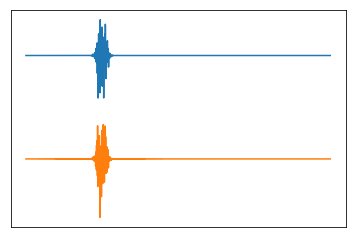

('the above plot shows a dispersed signal with central frequency of 800 and DM of ', 1)


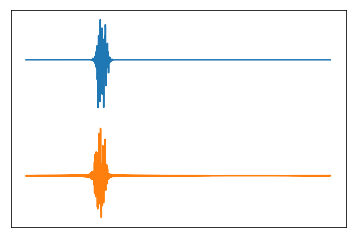

('the above plot shows a dispersed signal with central frequency of 800 and DM of ', 5)


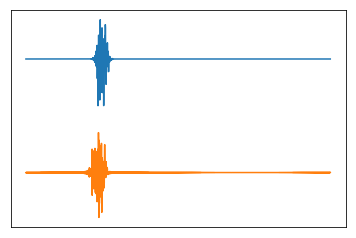

('the above plot shows a dispersed signal with central frequency of 800 and DM of ', 10)


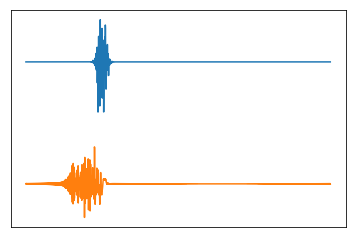

('the above plot shows a dispersed signal with central frequency of 800 and DM of ', 50)


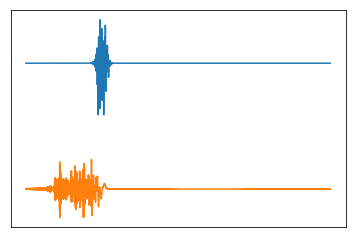

('the above plot shows a dispersed signal with central frequency of 800 and DM of ', 75)


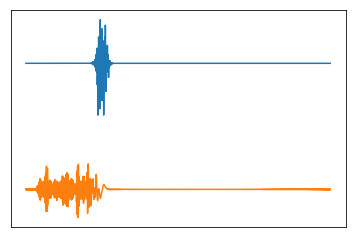

('the above plot shows a dispersed signal with central frequency of 800 and DM of ', 100)


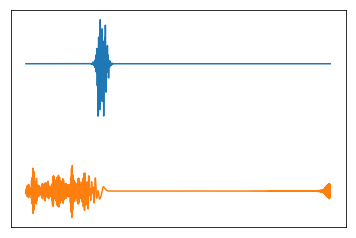

('the above plot shows a dispersed signal with central frequency of 800 and DM of ', 125)


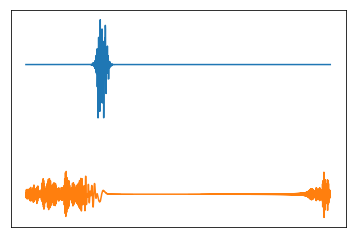

('the above plot shows a dispersed signal with central frequency of 800 and DM of ', 150)


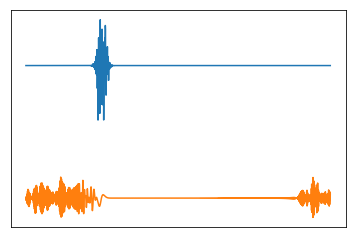

('the above plot shows a dispersed signal with central frequency of 800 and DM of ', 170)


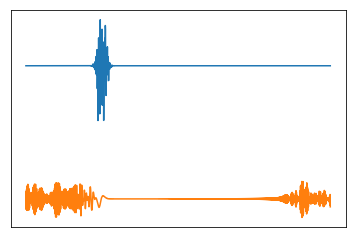

('the above plot shows a dispersed signal with central frequency of 800 and DM of ', 190)


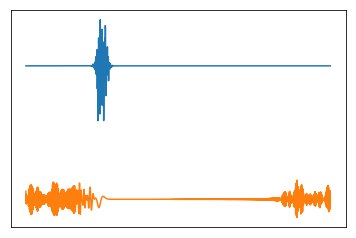

('the above plot shows a dispersed signal with central frequency of 800 and DM of ', 200)


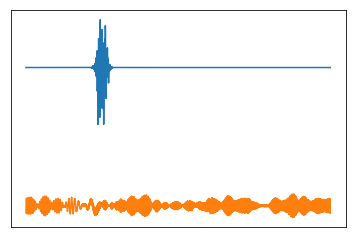

('the above plot shows a dispersed signal with central frequency of 800 and DM of ', 500)


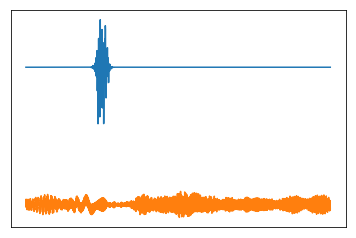

('the above plot shows a dispersed signal with central frequency of 800 and DM of ', 1000)


In [75]:
FREq = np.fft.rfftfreq(2*len(freq)-1)
f_0 = 1000
def H_dispersed(Dm):
    return np.exp(1j*2*np.pi*4.148808e9/((FREq+f_0)*f_0**2)*Dm*FREq**2)

D_M = [1,5,10,50,75,100,125,150,170,190,200,500,1000]

for Dm in D_M:
    c3 = a1*H_dispersed(Dm)
    c4 = np.fft.irfft(c3)
    #xlim(0,4000)
    xticks([])
    yticks([])
    plot(pulseSeries+4)
    plot(c4)
    show()
    print('the above plot shows a dispersed signal with central frequency of 800 and DM of ', Dm)

In [ ]:
qW = [1,2,3,4,5,6,7,8,9,10]
qW2 = [11,12,13,14,15,16,17,18,19,20]

QW = np.asarray(qW)
QW2 = np.asarray(qW2)

QQ = np.fft.rfftfreq(len(QW),d=0.01)
QQQ = np.fft.rfftfreq(len(QW2))
QQ_Q = np.fft.rfftfreq(len(QW),d=0.0001)
QQ_QQ = np.fft.rfftfreq(len(QW),d=.1)
QQ_QQQ = np.fft.rfftfreq(len(QW),d=2)
print(QQ)
print(QQ_Q)
print(QQ_QQ)
print(QQ_QQQ)
print(QQQ)

In [ ]:
sig.